In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_pickle('dataset3.pkl')
#conda activate wp

In [2]:
data.describe()
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903936 entries, 0 to 6903935
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transcript_id        object 
 1   transcript_position  object 
 2   sequence             object 
 3   dwell_time           float64
 4   sd                   float64
 5   mean                 float64
 6   m1_seq               object 
 7   m1_dtime             float64
 8   m1_sd                float64
 9   m1_mean              float64
 10  p1_seq               object 
 11  p1_dtime             float64
 12  p1_sd                float64
 13  p1_mean              float64
 14  gene_id              object 
 15  label                float64
dtypes: float64(10), object(6)
memory usage: 842.8+ MB


,transcript_id,transcript_position,sequence,dwell_time,sd,mean,m1_seq,m1_dtime,m1_sd,m1_mean,p1_seq,p1_dtime,p1_sd,p1_mean,gene_id,label
0,AT1G01050.1,155,AAACU,0.01260,1.97,111.0,GAAAC,0.00232,1.93,109.0,AACUA,0.00421,1.50,95.3,NaN,NaN
1,AT1G01050.1,155,AAACU,0.00536,2.49,110.0,GAAAC,0.00896,2.27,110.0,AACUA,0.00797,2.28,96.0,NaN,NaN
2,AT1G01050.1,155,AAACU,0.00442,2.07,111.0,GAAAC,0.00498,6.29,114.0,AACUA,0.00785,1.97,96.0,NaN,NaN
3,AT1G01050.1,155,AAACU,0.00830,2.70,105.0,GAAAC,0.00617,5.16,106.0,AACUA,0.00199,2.82,97.4,NaN,NaN
4,AT1G01050.1,155,AAACU,0.00495,1.89,110.0,GAAAC,0.00664,2.01,110.0,AACUA,0.01100,1.64,97.3,NaN,NaN




#some questions to be answered:

Basic counts: 

1. which sequences have the highest counts? 

2. which transcript_positions have the highest counts? 

3. which gene_ids have the highest counts of label1? (not for dataset1-3）

4. can we get a heatmap to see what are the relationships among the predictors? 



About sequences:

1. how many are there? 

2. Compare the mean dwell time&other metrics? 
    is there any relationship between? 

3. what is the proportion of modification? 



About modified vs unmodified: (not for dataset1-3 ）

1. what are the metric differences at -1, 0, 1? 







Which sequences have highest counts? 

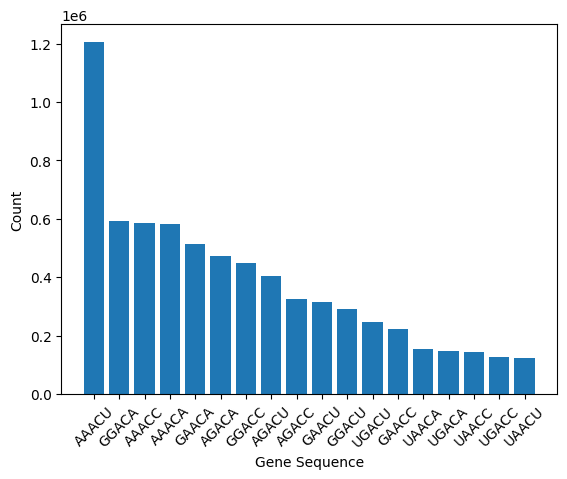

In [3]:
sequence_groups = data.groupby('sequence')
sequence_stats = sequence_groups.size().reset_index(name='counts').sort_values(by='counts', ascending=False)
plt.bar(sequence_stats['sequence'], sequence_stats['counts'])
plt.xlabel('Gene Sequence')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In Frequencies: 

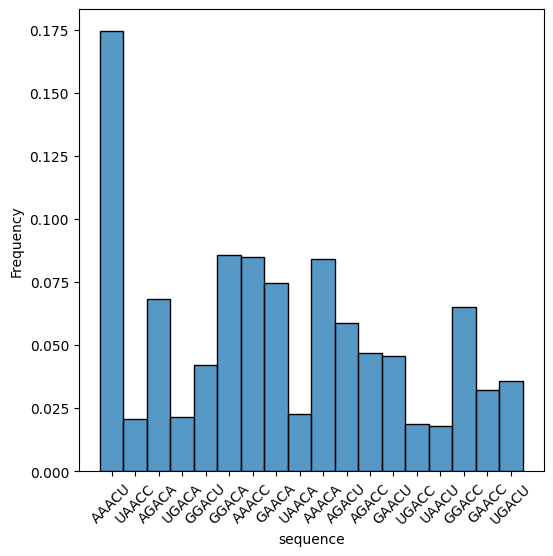

In [4]:
plt.figure(figsize=(6, 6)) 
sns.histplot(x='sequence',data=data,stat="probability")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

Numerical features comparison among the sequences: 

   sequence  dwell_time_average  mean_average  sd_average  dwell_time_std  \
0     AAACA            0.006889     99.301805    3.034908        0.004829   
1     AAACC            0.007047     99.705279    3.633273        0.004975   
2     AAACU            0.007384    105.763663    2.834481        0.004953   
3     AGACA            0.009324    126.050821    6.082462        0.005803   
4     AGACC            0.009206    127.110828    5.938115        0.005777   
5     AGACU            0.009034    130.052864    5.216590        0.005479   
6     GAACA            0.007234     94.889404    3.349633        0.004551   
7     GAACC            0.006709     92.940106    3.999208        0.004181   
8     GAACU            0.006989     99.850837    3.568608        0.004471   
9     GGACA            0.008626    118.008403    7.356042        0.006047   
10    GGACC            0.008605    119.203266    7.282294        0.005988   
11    GGACU            0.008610    123.063216    6.272045        0.005450   

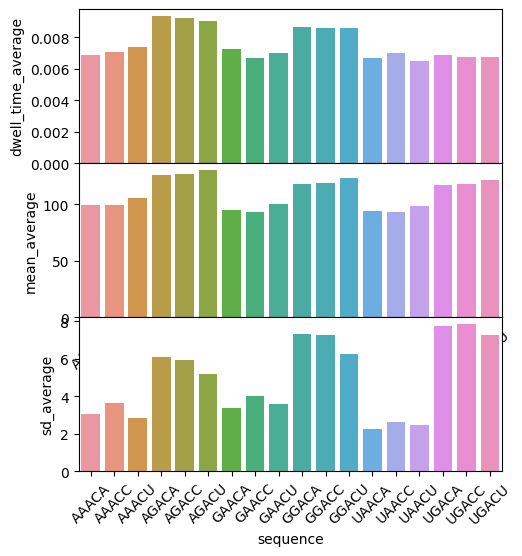

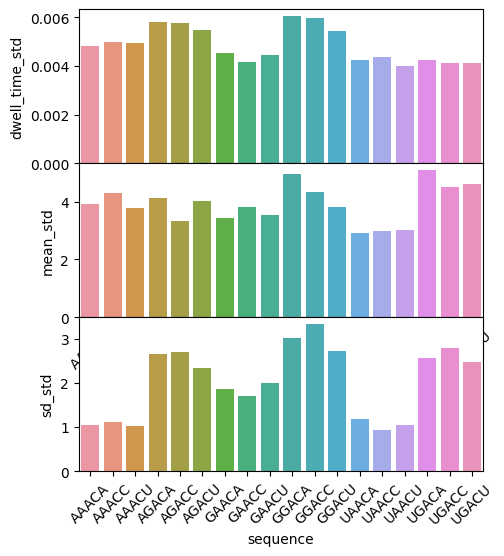

In [5]:

from matplotlib import gridspec

# Create a custom color palette for the labels
sequences_groups = data.groupby(['sequence'])
means=sequences_groups[['dwell_time','mean','sd']].mean()
variances=sequences_groups[['dwell_time','mean','sd']].std()
joined_data=means.join(variances,lsuffix='_average',rsuffix='_std').reset_index()
print(joined_data)
# Create a figure and gridspec

fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(3, 2, height_ratios=[3, 3, 3], width_ratios=[2, 2])
ax0 = plt.subplot(gs[0,0])
sns.barplot(x='sequence',y='dwell_time_average',data=joined_data)
plt.xticks(rotation=45)

ax1 = plt.subplot(gs[1,0])
sns.barplot(x='sequence',y='mean_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax2 = plt.subplot(gs[2,0])
sns.barplot(x='sequence',y='sd_average',data=joined_data)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0)
plt.show()

fig = plt.figure(figsize=(12, 6)) 

ax3 = plt.subplot(gs[0,1])
sns.barplot(x='sequence',y='dwell_time_std',data=joined_data)
plt.xticks(rotation=45)

ax4 = plt.subplot(gs[1,1])
sns.barplot(x='sequence',y='mean_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)

ax5 = plt.subplot(gs[2,1])
sns.barplot(x='sequence',y='sd_std',data=joined_data)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=.0, wspace=0.3)
plt.show()
